<a href="https://colab.research.google.com/github/StathisKratimenos/Colab/blob/main/GoalsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # θα ανοίξει button για να επιλέξεις το events.csv

# Ανέβηκε το αρχείο
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)
print(df.head())


Saving events.csv to events.csv
     id_odsp   id_event  sort_order  time  \
0  UFot0hit/  UFot0hit1           1     2   
1  UFot0hit/  UFot0hit2           2     4   
2  UFot0hit/  UFot0hit3           3     4   
3  UFot0hit/  UFot0hit4           4     7   
4  UFot0hit/  UFot0hit5           5     7   

                                                text  event_type  event_type2  \
0  Attempt missed. Mladen Petric (Hamburg) left f...           1         12.0   
1  Corner,  Borussia Dortmund. Conceded by Dennis...           2          NaN   
2  Corner,  Borussia Dortmund. Conceded by Heiko ...           2          NaN   
3           Foul by Sven Bender (Borussia Dortmund).           3          NaN   
4  Gokhan Tore (Hamburg) wins a free kick in the ...           8          NaN   

   side         event_team           opponent  ... player_in player_out  \
0     2         Hamburg SV  Borussia Dortmund  ...       NaN        NaN   
1     1  Borussia Dortmund         Hamburg SV  ...       NaN

In [ ]:
# Αν υπάρχει η στήλη "is_goal"
if "is_goal" in df.columns:
    df_goals = df[df["is_goal"] == 1].copy()
# Αν υπάρχει η στήλη "event_type"
elif "event_type" in df.columns:
    df_goals = df[df["event_type"].str.lower() == "goal"].copy()
else:
    raise ValueError("Δεν βρέθηκε ούτε 'is_goal' ούτε 'event_type' στο dataset!")

# Προαιρετικά: κρατάμε μόνο χρήσιμες στήλες
cols = ["match_id", "time", "event_team", "opponent", "event_type", "is_goal", "event_time"]
df_goals = df_goals[[c for c in cols if c in df_goals.columns]].copy()

# Δες τα πρώτα 5 rows
df_goals.info()


<class 'pandas.core.frame.DataFrame'>
Index: 24446 entries, 13 to 940948
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   time        24446 non-null  int64 
 1   event_team  24446 non-null  object
 2   opponent    24446 non-null  object
 3   event_type  24446 non-null  int64 
 4   is_goal     24446 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [ ]:
print("Σύνολο goals:", len(df_goals))


Σύνολο goals: 24446


In [ ]:
df_goals

,time,event_team,opponent,event_type,is_goal
13,17,Borussia Dortmund,Hamburg SV,1,1
26,29,Borussia Dortmund,Hamburg SV,1,1
50,49,Borussia Dortmund,Hamburg SV,1,1
92,80,Hamburg SV,Borussia Dortmund,1,1
175,48,SC Freiburg,FC Augsburg,1,1
...,...,...,...,...,...
940713,24,AS Monaco,Lorient,1,1
940716,28,AS Monaco,Lorient,1,1
940722,37,AS Monaco,Lorient,1,1
940742,59,AS Monaco,Lorient,1,1


In [ ]:
import numpy as np

# Ensure integers
df_goals["time"] = df_goals["time"].astype(int)

# Δημιουργία interval ανά 10 λεπτά
df_goals["interval"] = (df_goals["time"] // 10) * 10

# Προαιρετικά: cap > 90 σε 90
df_goals.loc[df_goals["interval"] > 90, "interval"] = 90

df_goals.head(10)


,time,event_team,opponent,event_type,is_goal,interval
13,17,Borussia Dortmund,Hamburg SV,1,1,10
26,29,Borussia Dortmund,Hamburg SV,1,1,20
50,49,Borussia Dortmund,Hamburg SV,1,1,40
92,80,Hamburg SV,Borussia Dortmund,1,1,80
175,48,SC Freiburg,FC Augsburg,1,1,40
183,53,FC Augsburg,SC Freiburg,1,1,50
184,55,SC Freiburg,FC Augsburg,1,1,50
211,81,FC Augsburg,SC Freiburg,1,1,80
317,60,Werder Bremen,Kaiserslautern,1,1,60
353,81,Werder Bremen,Kaiserslautern,1,1,80


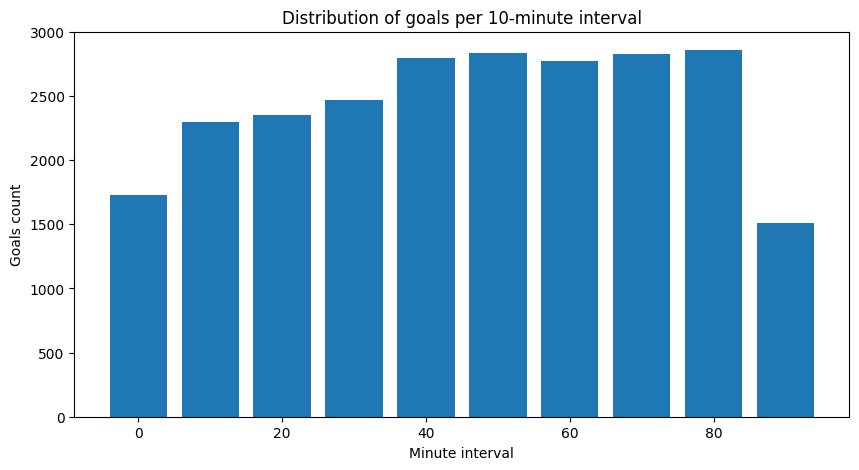

In [ ]:
# Group by interval και μετράμε γκολ
goals_by_interval = df_goals.groupby("interval").size().reset_index(name="goals_count")

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(goals_by_interval["interval"], goals_by_interval["goals_count"], width=8)
plt.xlabel("Minute interval")
plt.ylabel("Goals count")
plt.title("Distribution of goals per 10-minute interval")
plt.show()


In [ ]:
# Μοναδικά λεπτά γκολ
unique_minutes = df_goals["time"].unique()
unique_minutes.sort()  # προαιρετικά ταξινόμηση
print(unique_minutes)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98]


In [ ]:
# ensure integer
df_goals["time"] = df_goals["time"].astype(int)

# interval ανά 20 λεπτά
df_goals["interval_20"] = (df_goals["time"] // 20) * 20

# cap > 90 σε 80 ή 100 αν θέλεις
df_goals.loc[df_goals["interval_20"] > 80, "interval_20"] = 80

df_goals.head(10)


,time,event_team,opponent,event_type,is_goal,interval,interval_20
13,17,Borussia Dortmund,Hamburg SV,1,1,10,0
26,29,Borussia Dortmund,Hamburg SV,1,1,20,20
50,49,Borussia Dortmund,Hamburg SV,1,1,40,40
92,80,Hamburg SV,Borussia Dortmund,1,1,80,80
175,48,SC Freiburg,FC Augsburg,1,1,40,40
183,53,FC Augsburg,SC Freiburg,1,1,50,40
184,55,SC Freiburg,FC Augsburg,1,1,50,40
211,81,FC Augsburg,SC Freiburg,1,1,80,80
317,60,Werder Bremen,Kaiserslautern,1,1,60,60
353,81,Werder Bremen,Kaiserslautern,1,1,80,80


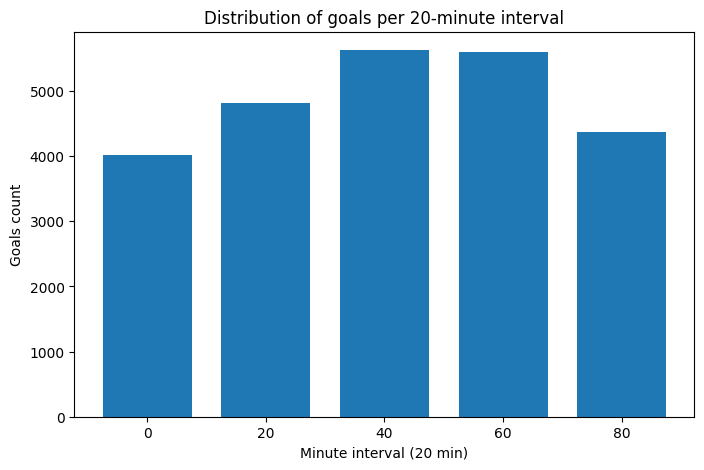

In [ ]:
goals_by_interval_20 = df_goals.groupby("interval_20").size().reset_index(name="goals_count")

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(goals_by_interval_20["interval_20"], goals_by_interval_20["goals_count"], width=15)
plt.xlabel("Minute interval (20 min)")
plt.ylabel("Goals count")
plt.title("Distribution of goals per 20-minute interval")
plt.show()


In [ ]:
import numpy as np

# ensure integer
df_goals["time"] = df_goals["time"].astype(int)

# Δημιουργία intervals 0-20,10-30,20-40,...80-100
interval_edges = np.arange(0, 101, 10)  # 0,10,20,...,100
interval_labels = [f"{start}-{start+20}" for start in interval_edges[:-2]]  # έως 80-100

# Δημιουργία DataFrame για να μετρήσουμε
counts = []
for start in interval_edges[:-2]:  # 0-80
    end = start + 20
    count = ((df_goals["time"] >= start) & (df_goals["time"] < end)).sum()
    counts.append({"interval": f"{start}-{end}", "goals_count": count})

df_interval_sliding = pd.DataFrame(counts)
df_interval_sliding


,interval,goals_count
0,0-20,4023
1,10-30,4648
2,20-40,4821
3,30-50,5262
4,40-60,5631
5,50-70,5607
6,60-80,5600
7,70-90,5688
8,80-100,4371


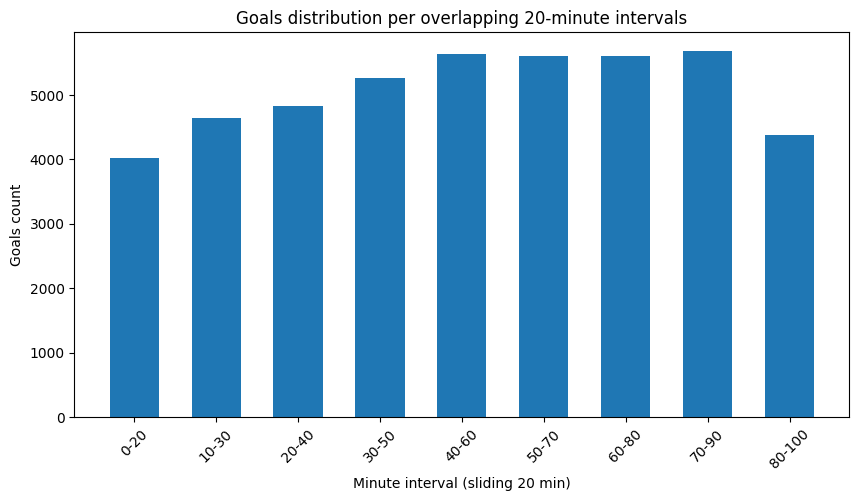

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(df_interval_sliding["interval"], df_interval_sliding["goals_count"], width=0.6)
plt.xticks(rotation=45)
plt.xlabel("Minute interval (sliding 20 min)")
plt.ylabel("Goals count")
plt.title("Goals distribution per overlapping 20-minute intervals")
plt.show()


/tmp/ipython-input-3009511824.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


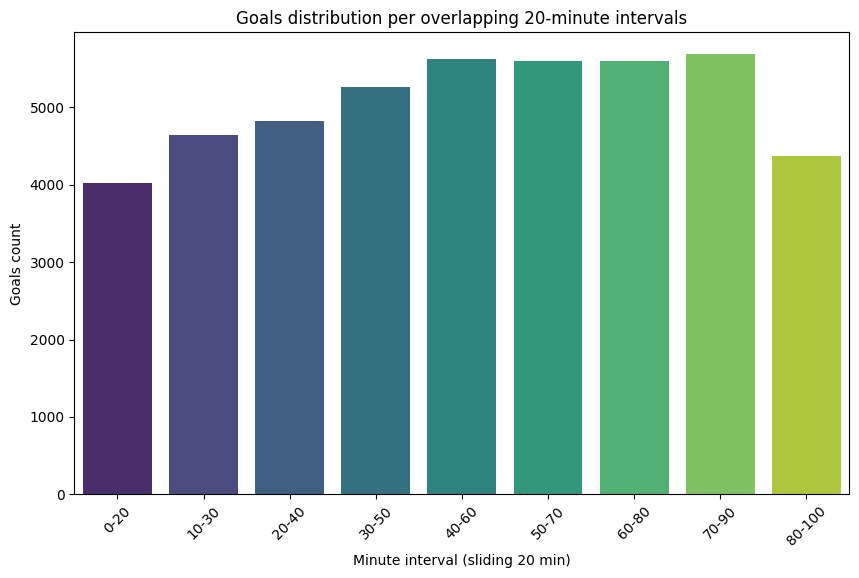

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_interval_sliding,
    x="interval",
    y="goals_count",
    palette="viridis"  # ωραίο gradient
)
plt.xlabel("Minute interval (sliding 20 min)")
plt.ylabel("Goals count")
plt.title("Goals distribution per overlapping 20-minute intervals")
plt.xticks(rotation=45)
plt.show()


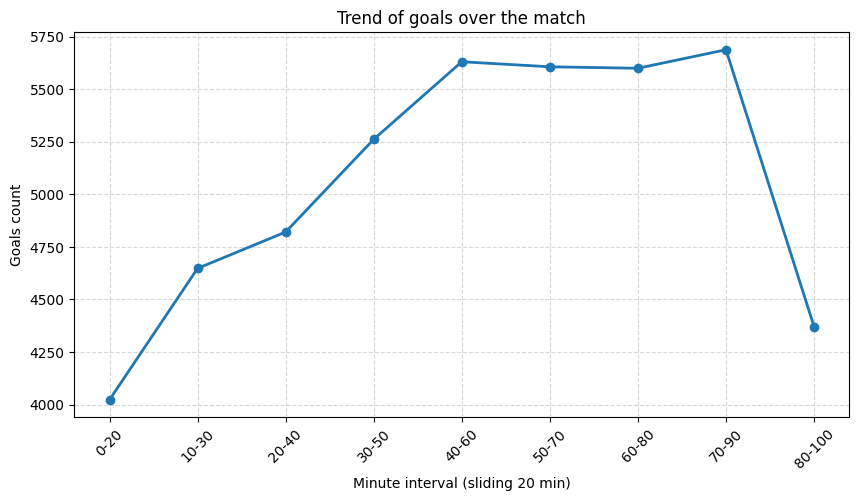

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_interval_sliding["interval"], df_interval_sliding["goals_count"], marker='o', linewidth=2)
plt.xticks(rotation=45)
plt.xlabel("Minute interval (sliding 20 min)")
plt.ylabel("Goals count")
plt.title("Trend of goals over the match")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


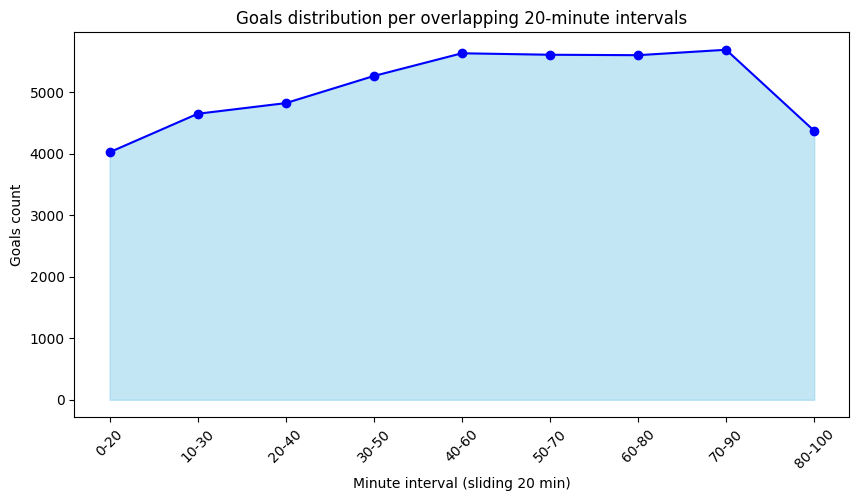

In [ ]:
plt.figure(figsize=(10,5))
plt.fill_between(df_interval_sliding["interval"], df_interval_sliding["goals_count"], color='skyblue', alpha=0.5)
plt.plot(df_interval_sliding["interval"], df_interval_sliding["goals_count"], marker='o', color='blue')
plt.xticks(rotation=45)
plt.xlabel("Minute interval (sliding 20 min)")
plt.ylabel("Goals count")
plt.title("Goals distribution per overlapping 20-minute intervals")
plt.show()


In [12]:
import glob
import os

folder_path = r"C:\Users\ekratimen\Downloads\football-data-master\football-data-master\data\goals_time"
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

print(all_files)
print(f"Βρέθηκαν {len(all_files)} αρχεία CSV")


[]
Βρέθηκαν 0 αρχεία CSV


In [13]:
import glob
import os

folder_path = r"C:\Users\ekratimen\Downloads\football-data-master\football-data-master\data\goals_time"

# Αναζήτηση για μικρά και κεφαλαία
all_files = glob.glob(os.path.join(folder_path, "*.csv")) + glob.glob(os.path.join(folder_path, "*.CSV"))
print(f"Βρέθηκαν {len(all_files)} αρχεία CSV")
print(all_files)


Βρέθηκαν 0 αρχεία CSV
[]


In [14]:
from google.colab import files
import pandas as pd

uploadedFiles = files.upload()  # θα ανοίξει button για να επιλέξεις το events.csv

# Ανέβηκε το αρχείο
file_nameF = list(uploadedFiles.keys())[0]

df = pd.read_csv(file_nameF)
print(df.head())



Saving aut-bundesliga.csv to aut-bundesliga.csv
Saving bel-pro-league.csv to bel-pro-league.csv
Saving bundesliga.csv to bundesliga.csv
Saving champions-league.csv to champions-league.csv
Saving cze-1-fotbalova-liga.csv to cze-1-fotbalova-liga.csv
Saving dfb-pokal.csv to dfb-pokal.csv
Saving eng-fa-cup.csv to eng-fa-cup.csv
Saving eng-league-cup.csv to eng-league-cup.csv
Saving eng-premier-league.csv to eng-premier-league.csv
Saving esp-copa-del-rey.csv to esp-copa-del-rey.csv
Saving esp-primera-division.csv to esp-primera-division.csv
Saving europa-league.csv to europa-league.csv
Saving fra-coupe-de-france.csv to fra-coupe-de-france.csv
Saving fra-ligue-1.csv to fra-ligue-1.csv
Saving gre-super-league.csv to gre-super-league.csv
Saving ita-serie-a.csv to ita-serie-a.csv
Saving ned-eredivisie.csv to ned-eredivisie.csv
Saving nor-eliteserien.csv to nor-eliteserien.csv
Saving pol-ekstraklasa.csv to pol-ekstraklasa.csv
Saving por-primeira-liga.csv to por-primeira-liga.csv
Saving sco-premi

In [15]:
df.info

<bound method DataFrame.info of          scoring_player        scoring_team  time  GH  GA  \
0            Peter Wurz         VfB Mödling    27   1   0   
1          Manfred Zsak        Austria Wien    40   1   1   
2           Arnold Wetl          Sturm Graz    30   1   0   
3          Thomas Gröbl      Vorwärts Steyr    72   1   1   
4        Souleyman Sané  FC Tirol Innsbruck    54   1   0   
...                 ...                 ...   ...  ..  ..   
33803    Jamie Lawrence           Grazer AK    76   2   1   
33804    Maurice Malone        Austria Wien    61   0   1   
33805   Tochi Chukwuani          Sturm Graz    11   0   1   
33806  Erencan Yardımcı          Sturm Graz    57   0   2   
33807    Marco Hoffmann        TSV Hartberg  90+2   1   2   

                                      game        date     season  
0         VfB Mödling vs. Austria Wien 1:1  1994-08-02  1994-1995  
1         VfB Mödling vs. Austria Wien 1:1  1994-08-02  1994-1995  
2        Sturm Graz vs. Vorwärts Steyr 1:1  1994-08-03  1994-1995  
3        Sturm Graz vs. Vorwärts Steyr 1:1  1994-08-03  1994-1995  
4       FC Tirol Innsbruck vs. FC Linz 3:0  1994-08-03  1994-1995  
...                                    ...         ...        ...  
33803          Grazer AK vs. WSG Tirol 2:1  2024-11-09  2024-2025  
33804  Wolfsberger AC vs. Austria Wien 0:1  2024-11-09  2024-2025  
33805      TSV Hartberg vs. Sturm Graz 1:2  2024-11-09  2024-2025  
33806      TSV Hartberg vs. Sturm Graz 1:2  2024-11-09  2024-2025  
33807      TSV Hartberg vs. Sturm Graz 1:2  2024-11-09  2024-2025  

[33808 rows x 8 columns]>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33502 entries, 0 to 33806
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   scoring_player  33502 non-null  object
 1   scoring_team    33502 non-null  object
 2   time            33502 non-null  int64 
 3   GH              33502 non-null  int64 
 4   GA              33502 non-null  int64 
 5   game            33502 non-null  object
 6   date            33502 non-null  object
 7   season          33502 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.3+ MB


In [22]:
df

,scoring_player,scoring_team,time,GH,GA,game,date,season
0,Peter Wurz,VfB Mödling,27,1,0,VfB Mödling vs. Austria Wien 1:1,1994-08-02,1994-1995
1,Manfred Zsak,Austria Wien,40,1,1,VfB Mödling vs. Austria Wien 1:1,1994-08-02,1994-1995
2,Arnold Wetl,Sturm Graz,30,1,0,Sturm Graz vs. Vorwärts Steyr 1:1,1994-08-03,1994-1995
3,Thomas Gröbl,Vorwärts Steyr,72,1,1,Sturm Graz vs. Vorwärts Steyr 1:1,1994-08-03,1994-1995
4,Souleyman Sané,FC Tirol Innsbruck,54,1,0,FC Tirol Innsbruck vs. FC Linz 3:0,1994-08-03,1994-1995
...,...,...,...,...,...,...,...,...
33802,Tobias Anselm,WSG Tirol,61,1,1,Grazer AK vs. WSG Tirol 2:1,2024-11-09,2024-2025
33803,Jamie Lawrence,Grazer AK,76,2,1,Grazer AK vs. WSG Tirol 2:1,2024-11-09,2024-2025
33804,Maurice Malone,Austria Wien,61,0,1,Wolfsberger AC vs. Austria Wien 0:1,2024-11-09,2024-2025
33805,Tochi Chukwuani,Sturm Graz,11,0,1,TSV Hartberg vs. Sturm Graz 1:2,2024-11-09,2024-2025


In [20]:
# Μετατρέπουμε σε αριθμό, μη-αριθμητικά γίνονται NaN
df['time'] = pd.to_numeric(df['time'], errors='coerce')

# Αφαιρούμε τις γραμμές που δεν έχουν έγκυρο χρόνο
df = df.dropna(subset=['time'])

# Τώρα η στήλη είναι float, μπορούμε να την κάνουμε int
df['time'] = df['time'].astype(int)

print(df['time'].head())


0    27
1    40
2    30
3    72
4    54
Name: time, dtype: int64


/tmp/ipython-input-3442917565.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df['time'].astype(int)


In [23]:
# Ορισμός bins και labels
bins = [0, 15, 30, 45, 60, 75, 90, 105, 120]
labels = ['0-15','16-30','31-45','46-60','61-75','76-90','91-105','106-120']

# Δημιουργία νέας στήλης με χρονικά διαστήματα
df['time_interval'] = pd.cut(df['time'], bins=bins, labels=labels, right=True)


/tmp/ipython-input-1756481102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_interval'] = pd.cut(df['time'], bins=bins, labels=labels, right=True)


In [24]:
df['time_interval'].value_counts().sort_index()


,count
time_interval,
0-15,4352
16-30,4744
31-45,5442
46-60,5533
61-75,5693
76-90,7718
91-105,20
106-120,0


In [26]:
goal_counts = df['time_interval'].value_counts().sort_index()
print(goal_counts)

time_interval
0-15       4352
16-30      4744
31-45      5442
46-60      5533
61-75      5693
76-90      7718
91-105       20
106-120       0
Name: count, dtype: int64


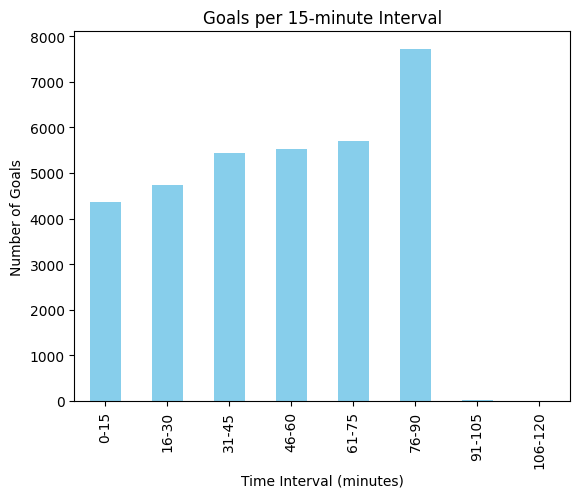

In [27]:
import matplotlib.pyplot as plt

goal_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Time Interval (minutes)")
plt.ylabel("Number of Goals")
plt.title("Goals per 15-minute Interval")
plt.show()


Goals per 10-minute interval:
time_interval
1-10       2771
11-20      3096
21-30      3229
31-40      3313
41-50      3664
51-60      3998
61-70      3843
71-80      3784
81-90      5784
91-100       19
101-110       1
111-120       0
Name: count, dtype: int64


/tmp/ipython-input-1843953432.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_numeric(df['time'], errors='coerce')  # μη αριθμητικά γίνονται NaN


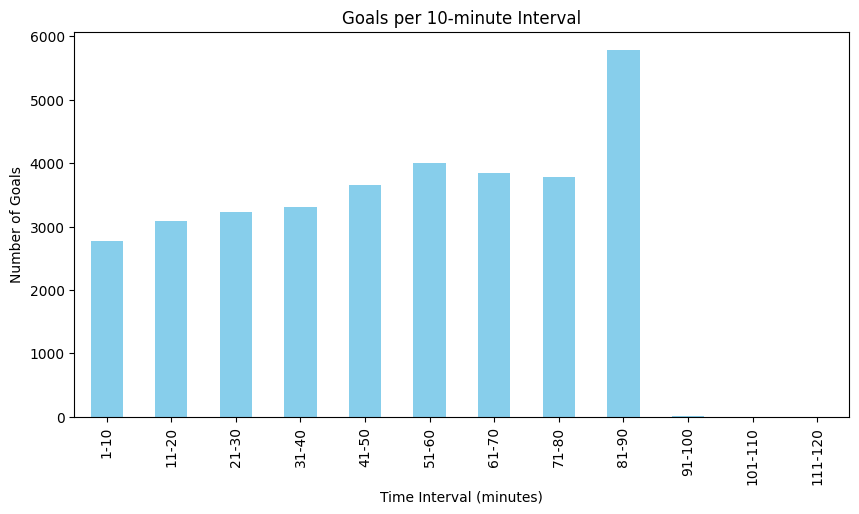

Goals per 15-minute interval:
time_interval
1-15       4352
16-30      4744
31-45      5442
46-60      5533
61-75      5693
76-90      7718
91-105       20
106-120       0
Name: count, dtype: int64


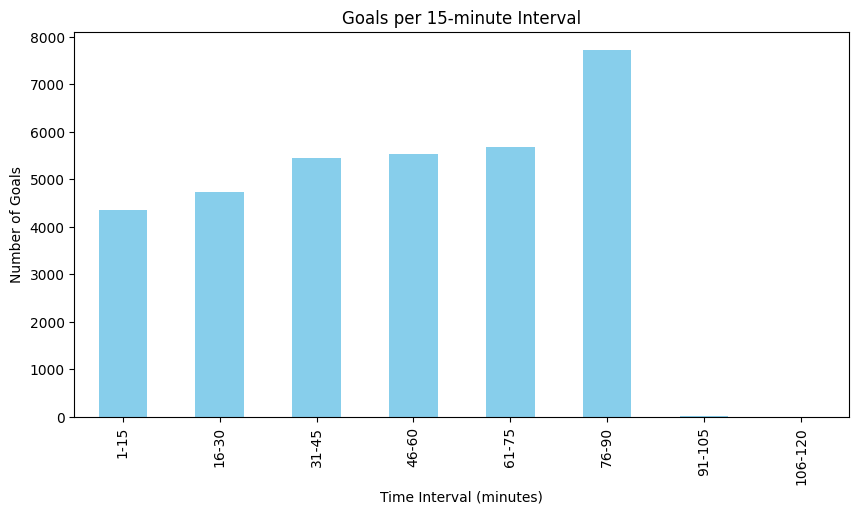

Goals per 20-minute interval:
time_interval
1-20       5867
21-40      6542
41-60      7662
61-80      7627
81-100     5803
101-120       1
Name: count, dtype: int64


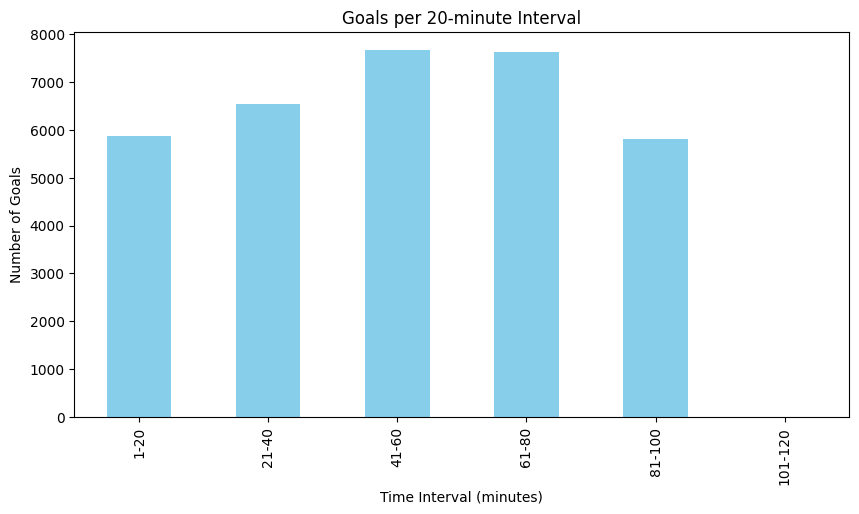

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Καθαρισμός στήλης time ---
df['time'] = pd.to_numeric(df['time'], errors='coerce')  # μη αριθμητικά γίνονται NaN
df = df.dropna(subset=['time'])
df['time'] = df['time'].astype(int)

# --- Συνάρτηση για διαστήματα και plot ---
def plot_goals_by_interval(df, interval_minutes):
    bins = list(range(0, 121, interval_minutes))
    labels = [f"{b+1}-{b+interval_minutes}" for b in bins[:-1]]

    df['time_interval'] = pd.cut(df['time'], bins=bins, labels=labels, right=True)

    goal_counts = df['time_interval'].value_counts().sort_index()

    print(f"Goals per {interval_minutes}-minute interval:")
    print(goal_counts)

    goal_counts.plot(kind='bar', color='skyblue', figsize=(10,5))
    plt.xlabel("Time Interval (minutes)")
    plt.ylabel("Number of Goals")
    plt.title(f"Goals per {interval_minutes}-minute Interval")
    plt.show()

# --- 10λεπτα ---
plot_goals_by_interval(df, 10)

# --- 15λεπτα ---
plot_goals_by_interval(df, 15)

# --- 20λεπτα ---
plot_goals_by_interval(df, 20)


   interval  goals
0      0-20   5544
1     10-30   6301
2     20-40   6506
3     30-50   6993
4     40-60   7617
5     50-70   7742
6     60-80   7629
7     70-90   7898
8    80-100   6205
9    90-110   2121
10  100-120      1


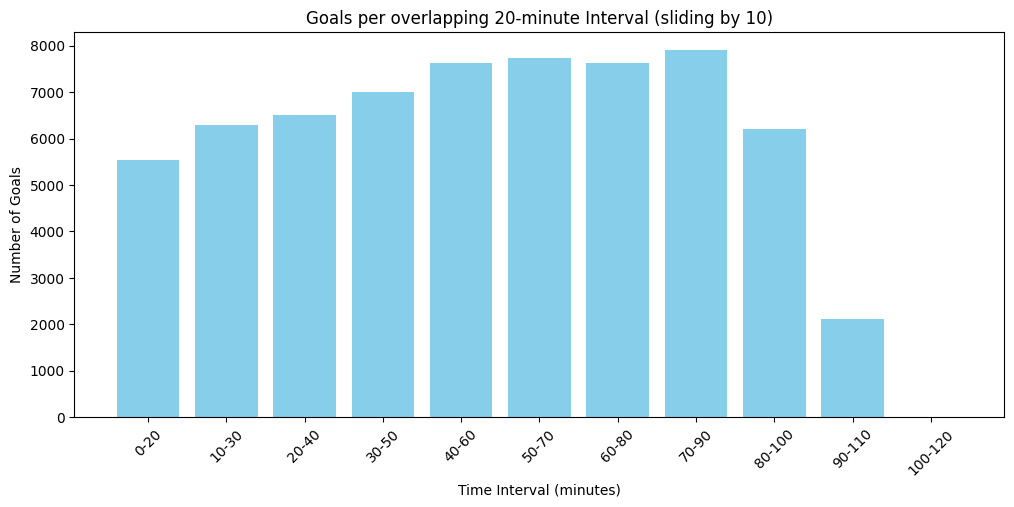

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Καθαρισμός στήλης time ---
df['time'] = pd.to_numeric(df['time'], errors='coerce')  # μη αριθμητικά γίνονται NaN
df = df.dropna(subset=['time'])
df['time'] = df['time'].astype(int)

# --- Sliding window 20λεπτα ---
window_size = 20
step = 10  # βήμα για επικάλυψη
max_time = df['time'].max()

intervals = []
counts = []

start = 0
while start <= max_time:
    end = start + window_size
    intervals.append(f"{start}-{end}")
    count = df[(df['time'] >= start) & (df['time'] < end)].shape[0]
    counts.append(count)
    start += step

# --- Δημιουργία DataFrame για plot ---
df_intervals = pd.DataFrame({
    'interval': intervals,
    'goals': counts
})

# --- Εκτύπωση ---
print(df_intervals)

# --- Οπτικοποίηση ---
plt.figure(figsize=(12,5))
plt.bar(df_intervals['interval'], df_intervals['goals'], color='skyblue')
plt.xlabel("Time Interval (minutes)")
plt.ylabel("Number of Goals")
plt.title("Goals per overlapping 20-minute Interval (sliding by 10)")
plt.xticks(rotation=45)
plt.show()


   interval  goals
0      0-15   4000
1      5-20   4608
2     10-25   4688
3     15-30   4748
4     20-35   4752
5     25-40   4915
6     30-45   4937
7     35-50   5445
8     40-55   5638
9     45-60   5982
10    50-65   5768
11    55-70   5795
12    60-75   5737
13    65-80   5787
14    70-85   5828
15    75-90   5977
16    80-95   6204
17   85-100   4190
18   90-105   2120
19   95-110      2
20  100-115      1
21  105-120      1


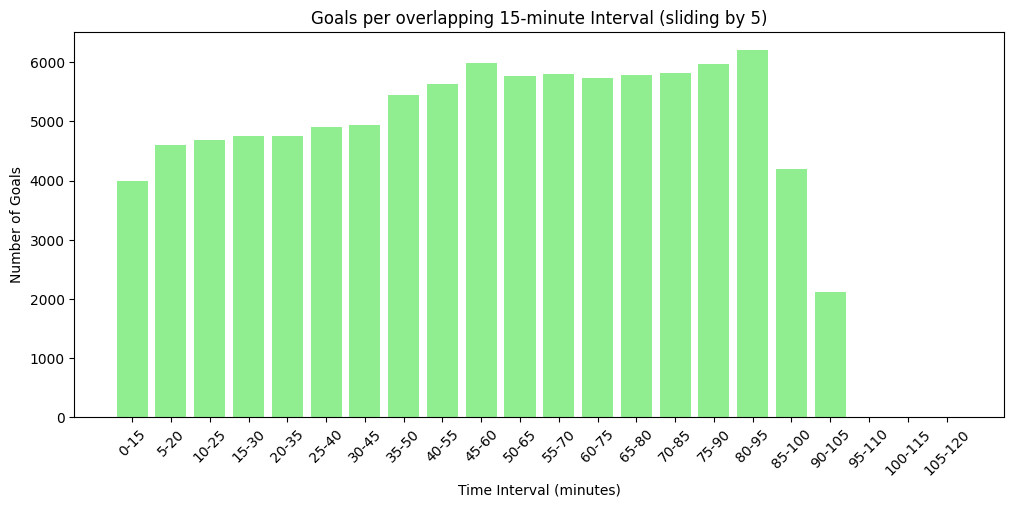

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Καθαρισμός στήλης time ---
df['time'] = pd.to_numeric(df['time'], errors='coerce')
df = df.dropna(subset=['time'])
df['time'] = df['time'].astype(int)

# --- Sliding window 15λεπτα με step 5 ---
window_size = 15
step = 5
max_time = df['time'].max()

intervals = []
counts = []

start = 0
while start <= max_time:
    end = start + window_size
    intervals.append(f"{start}-{end}")
    count = df[(df['time'] >= start) & (df['time'] < end)].shape[0]
    counts.append(count)
    start += step

# --- Δημιουργία DataFrame για plot ---
df_intervals = pd.DataFrame({
    'interval': intervals,
    'goals': counts
})

# --- Εκτύπωση ---
print(df_intervals)

# --- Οπτικοποίηση ---
plt.figure(figsize=(12,5))
plt.bar(df_intervals['interval'], df_intervals['goals'], color='lightgreen')
plt.xlabel("Time Interval (minutes)")
plt.ylabel("Number of Goals")
plt.title("Goals per overlapping 15-minute Interval (sliding by 5)")
plt.xticks(rotation=45)
plt.show()


   interval  goals
0      0-10   2447
1      5-15   3064
2     10-20   3097
3     15-25   3135
4     20-30   3204
5     25-35   3161
6     30-40   3302
7     35-45   3389
8     40-50   3691
9     45-55   4003
10    50-60   3926
11    55-65   3821
12    60-70   3816
13    65-75   3895
14    70-80   3813
15    75-85   3907
16    80-90   4085
17    85-95   4189
18   90-100   2120
19   95-105      1
20  100-110      1
21  105-115      1


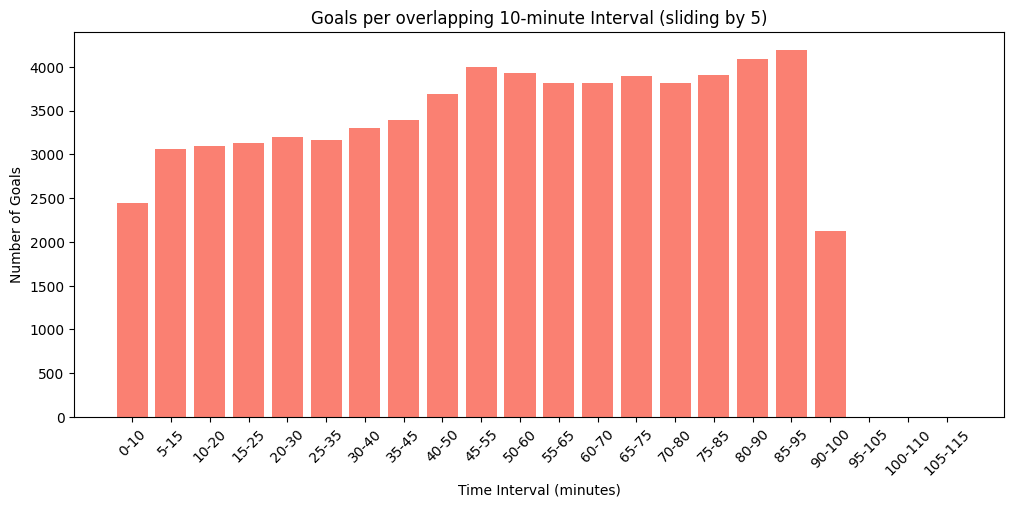

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Καθαρισμός στήλης time ---
df['time'] = pd.to_numeric(df['time'], errors='coerce')
df = df.dropna(subset=['time'])
df['time'] = df['time'].astype(int)

# --- Sliding window 10λεπτα με step 5 ---
window_size = 10
step = 5
max_time = df['time'].max()

intervals = []
counts = []

start = 0
while start <= max_time:
    end = start + window_size
    intervals.append(f"{start}-{end}")
    count = df[(df['time'] >= start) & (df['time'] < end)].shape[0]
    counts.append(count)
    start += step

# --- Δημιουργία DataFrame για plot ---
df_intervals = pd.DataFrame({
    'interval': intervals,
    'goals': counts
})

# --- Εκτύπωση ---
print(df_intervals)

# --- Οπτικοποίηση ---
plt.figure(figsize=(12,5))
plt.bar(df_intervals['interval'], df_intervals['goals'], color='salmon')
plt.xlabel("Time Interval (minutes)")
plt.ylabel("Number of Goals")
plt.title("Goals per overlapping 10-minute Interval (sliding by 5)")
plt.xticks(rotation=45)
plt.show()


   interval  goals
0      0-20   5544
1      5-25   6199
2     10-30   6301
3     15-35   6296
4     20-40   6506
5     25-45   6550
6     30-50   6993
7     35-55   7392
8     40-60   7617
9     45-65   7824
10    50-70   7742
11    55-75   7716
12    60-80   7629
13    65-85   7802
14    70-90   7898
15    75-95   8096
16   80-100   6205
17   85-105   4190
18   90-110   2121
19   95-115      2
20  100-120      1
21  105-125      1


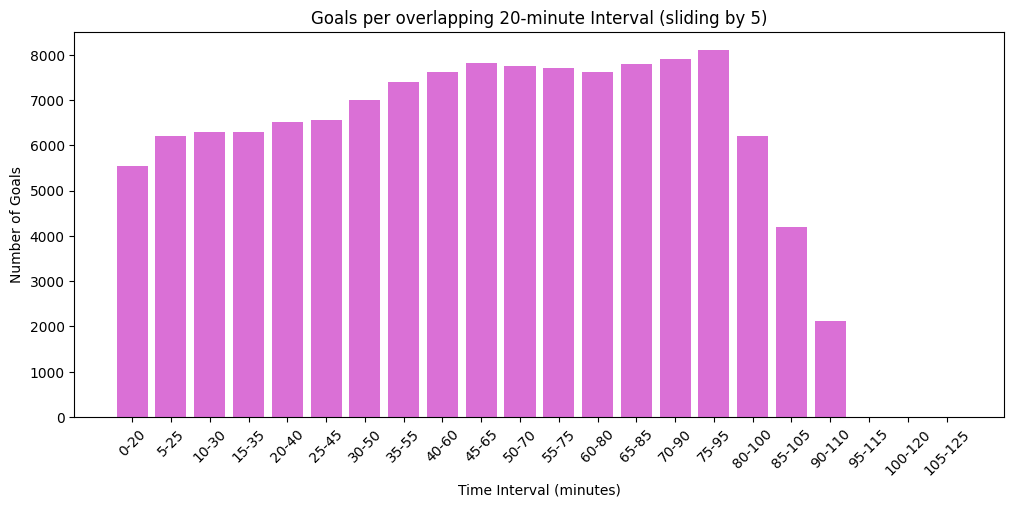

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Καθαρισμός στήλης time ---
df['time'] = pd.to_numeric(df['time'], errors='coerce')
df = df.dropna(subset=['time'])
df['time'] = df['time'].astype(int)

# --- Sliding window 20λεπτα με step 5 ---
window_size = 20
step = 5
max_time = df['time'].max()

intervals = []
counts = []

start = 0
while start <= max_time:
    end = start + window_size
    intervals.append(f"{start}-{end}")
    count = df[(df['time'] >= start) & (df['time'] < end)].shape[0]
    counts.append(count)
    start += step

# --- Δημιουργία DataFrame για plot ---
df_intervals = pd.DataFrame({
    'interval': intervals,
    'goals': counts
})

# --- Εκτύπωση ---
print(df_intervals)

# --- Οπτικοποίηση ---
plt.figure(figsize=(12,5))
plt.bar(df_intervals['interval'], df_intervals['goals'], color='orchid')
plt.xlabel("Time Interval (minutes)")
plt.ylabel("Number of Goals")
plt.title("Goals per overlapping 20-minute Interval (sliding by 5)")
plt.xticks(rotation=45)
plt.show()


   interval  goals
0      0-20   5544
1      1-21   5867
2      2-22   6019
3      3-23   6131
4      4-24   6144
5      5-25   6199
6      6-26   6210
7      7-27   6269
8      8-28   6227
9      9-29   6244
10    10-30   6301
11    11-31   6325
12    12-32   6290
13    13-33   6266
14    14-34   6319
15    15-35   6296
16    16-36   6269
17    17-37   6337
18    18-38   6396
19    19-39   6485
20    20-40   6506
21    21-41   6542
22    22-42   6560
23    23-43   6472
24    24-44   6539
25    25-45   6550
26    26-46   7081
27    27-47   6957
28    28-48   7002
29    29-49   7045


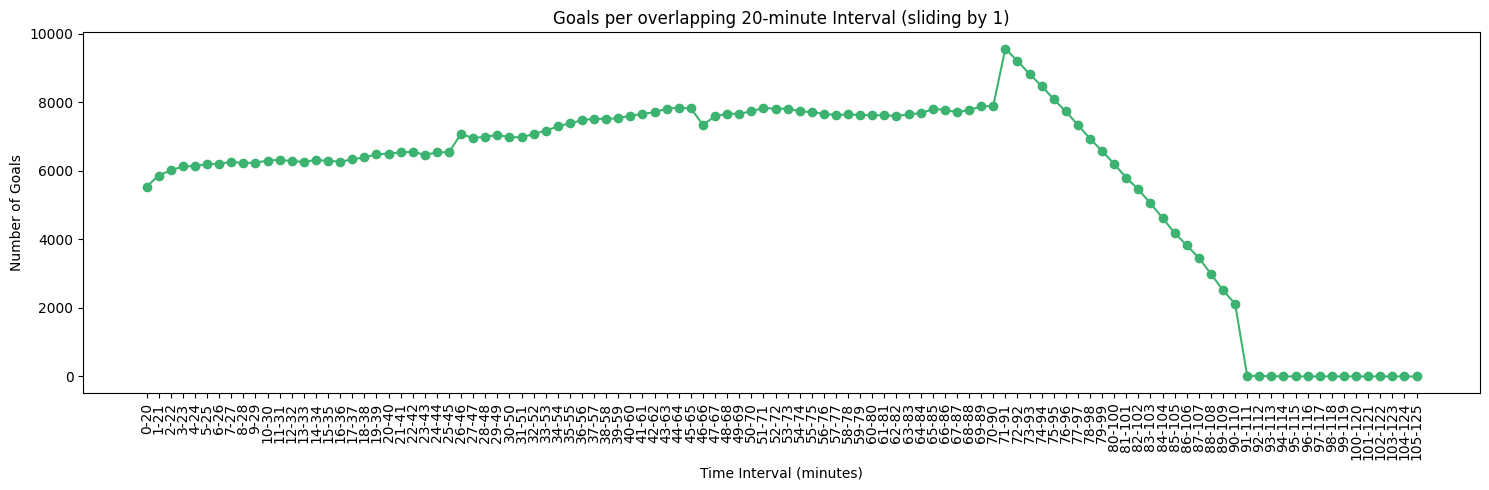

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Καθαρισμός στήλης time ---
df['time'] = pd.to_numeric(df['time'], errors='coerce')
df = df.dropna(subset=['time'])
df['time'] = df['time'].astype(int)

# --- Sliding window 20λεπτα με step 1 ---
window_size = 20
step = 1
max_time = df['time'].max()

intervals = []
counts = []

start = 0
while start <= max_time:
    end = start + window_size
    intervals.append(f"{start}-{end}")
    count = df[(df['time'] >= start) & (df['time'] < end)].shape[0]
    counts.append(count)
    start += step

# --- Δημιουργία DataFrame για plot ---
df_intervals = pd.DataFrame({
    'interval': intervals,
    'goals': counts
})

# --- Εκτύπωση ---
print(df_intervals.head(30))  # εκτύπωση μόνο των πρώτων 30 για ευκολία

# --- Οπτικοποίηση ---
plt.figure(figsize=(15,5))
plt.plot(df_intervals['interval'], df_intervals['goals'], color='mediumseagreen', marker='o')
plt.xlabel("Time Interval (minutes)")
plt.ylabel("Number of Goals")
plt.title("Goals per overlapping 20-minute Interval (sliding by 1)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [41]:
# Ταξινόμηση κατά 'goals' φθίνουσα
df_intervals_sorted = df_intervals.sort_values(by='goals', ascending=False)

# Δες τις πρώτες γραμμές
df_intervals_sorted.head(50)


,interval,goals
81,81-91,5784
82,82-92,5447
83,83-93,5046
84,84-94,4628
85,85-95,4189
80,80-90,4085
79,79-89,4069
45,45-55,4003
51,51-61,3998
52,52-62,3976


   interval  goals
81    81-91   5784
82    82-92   5447
83    83-93   5046
84    84-94   4628
85    85-95   4189
80    80-90   4085
79    79-89   4069
45    45-55   4003
51    51-61   3998
52    52-62   3976
53    53-63   3952
78    78-88   3947
44    44-54   3934
50    50-60   3926
36    36-46   3917
54    54-64   3911
76    76-86   3909
75    75-85   3907
65    65-75   3895
77    77-87   3883
66    66-76   3878
63    63-73   3868
43    43-53   3866
74    74-84   3853
48    48-58   3850
49    49-59   3847
61    61-71   3843
62    62-72   3839
64    64-74   3832
67    67-77   3831
68    68-78   3830
86    86-96   3828
55    55-65   3821
58    58-68   3820
59    59-69   3820
60    60-70   3816
69    69-79   3815
70    70-80   3813
57    57-67   3803
47    47-57   3792
56    56-66   3788
73    73-83   3785
71    71-81   3784
72    72-82   3766
42    42-52   3740
37    37-47   3736
40    40-50   3691
39    39-49   3691
38    38-48   3667
41    41-51   3664


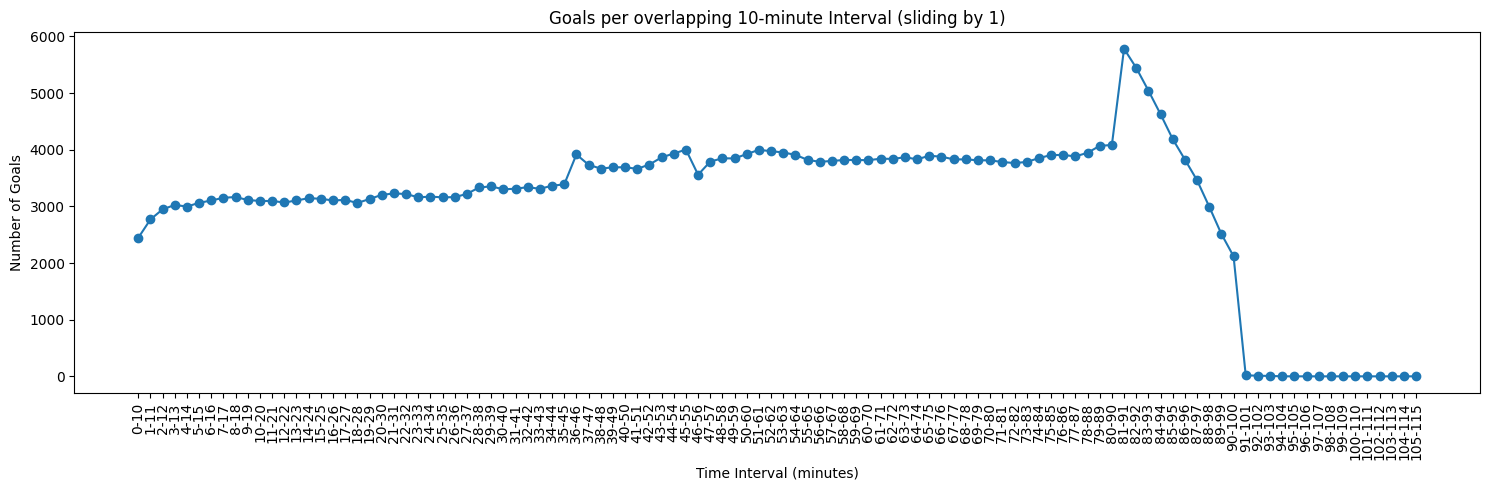

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Καθαρισμός στήλης time ---
df['time'] = pd.to_numeric(df['time'], errors='coerce')
df = df.dropna(subset=['time'])
df['time'] = df['time'].astype(int)

# --- Sliding window 10λεπτα με step 1 ---
window_size = 10
step = 1
max_time = df['time'].max()

intervals = []
counts = []

start = 0
while start <= max_time:
    end = start + window_size
    intervals.append(f"{start}-{end}")
    count = df[(df['time'] >= start) & (df['time'] < end)].shape[0]
    counts.append(count)
    start += step

# --- Δημιουργία DataFrame ---
df_intervals = pd.DataFrame({
    'interval': intervals,
    'goals': counts
})

# --- Ταξινόμηση αν θέλεις (προαιρετικό) ---
df_intervals_sorted = df_intervals.sort_values(by="goals", ascending=False)

print(df_intervals_sorted.head(50))

# --- Οπτικοποίηση ---
plt.figure(figsize=(15,5))
plt.plot(df_intervals['interval'], df_intervals['goals'], marker='o')
plt.xlabel("Time Interval (minutes)")
plt.ylabel("Number of Goals")
plt.title("Goals per overlapping 10-minute Interval (sliding by 1)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [42]:
import pandas as pd

# 1. Βεβαιώσου ότι η στήλη date είναι datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 2. Αφαίρεσε γραμμές χωρίς έγκυρη ημερομηνία (προαιρετικό αλλά χρήσιμο)
missing_dates = df['date'].isna().sum()
print(f"Αριθμός γραμμών με άκυρη/κενή ημερομηνία: {missing_dates}")
df = df.dropna(subset=['date'])

# 3. Υπολογισμός cutoff για τελευταία 5ετία (5 χρόνια πριν από σήμερα)
cutoff = pd.Timestamp.today().normalize() - pd.DateOffset(years=5)
print(f"Cutoff (5 χρόνια πριν): {cutoff.date()}")

# 4. Φιλτράρισμα
df_last5 = df[df['date'] >= cutoff].copy()

# 5. Έλεγχοι / πληροφορίες
print(f"Συνολικές γραμμές αρχικού df: {len(df)}")
print(f"Συνολικές γραμμές μετά το φίλτρο (τελευταία 5ετία): {len(df_last5)}")
print(f"Εύρος ημερομηνιών στα δεδομένα μετά το φίλτρο: {df_last5['date'].min()} -> {df_last5['date'].max()}")
print("Πλήθος μοναδικών αγώνων:", df_last5['game'].nunique())
print("Μοναδικές σεζόν στα φιλτραρισμένα δεδομένα:", sorted(df_last5['season'].unique())[:10], "...")

# 6. Προαιρετικά αποθήκευση για επόμενα βήματα
df_last5.to_csv("goals_last5_years.csv", index=False)
print("Αποθηκεύτηκε: goals_last5_years.csv")


Αριθμός γραμμών με άκυρη/κενή ημερομηνία: 0
Cutoff (5 χρόνια πριν): 2020-11-25
Συνολικές γραμμές αρχικού df: 33502
Συνολικές γραμμές μετά το φίλτρο (τελευταία 5ετία): 5089
Εύρος ημερομηνιών στα δεδομένα μετά το φίλτρο: 2020-11-28 00:00:00 -> 2024-11-09 00:00:00
Πλήθος μοναδικών αγώνων: 659
Μοναδικές σεζόν στα φιλτραρισμένα δεδομένα: ['2020-2021', '2021-2022', '2022-2023', '2023-2024', '2024-2025'] ...
Αποθηκεύτηκε: goals_last5_years.csv


Top 20 intervals by goals (descending):
interval  goals  start
   81-91    743     81
   82-92    699     82
   70-80    645     70
   83-93    644     83
   69-79    633     69
   76-86    623     76
   78-88    623     78
   71-81    605     71
   77-87    605     77
   75-85    601     75
   44-54    601     44
   74-84    600     74
   79-89    599     79
   51-61    598     51
   72-82    593     72
   68-78    588     68
   73-83    587     73
   43-53    585     43
   84-94    583     84
   67-77    579     67

First 30 intervals in chronological order:
interval  goals  start
    0-10    404      0
    1-11    465      1
    2-12    491      2
    3-13    507      3
    4-14    522      4
    5-15    519      5
    6-16    540      6
    7-17    561      7
    8-18    579      8
    9-19    574      9
   10-20    571     10
   11-21    558     11
   12-22    549     12
   13-23    558     13
   14-24    549     14
   15-25    532     15
   16-26    537     16
   17-27    536    

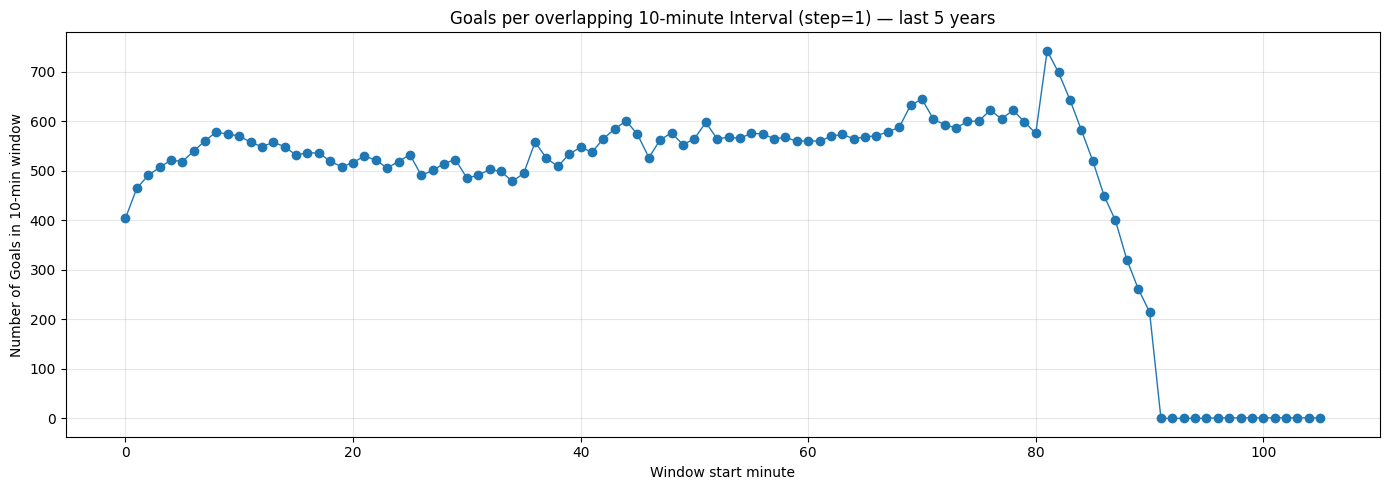


Saved CSVs: intervals_10min_step1_sorted_by_goals.csv, intervals_10min_step1_chronological.csv


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Υπόθεση: έχεις ήδη df_last5 από το προηγούμενο βήμα ---
# Αν όχι, βάλε df_last5 = df (ή τρέξε το φίλτρο που σου έδωσα πριν)

# --- 1) Καθαρισμός στήλης time (ασφαλές) ---
df_last5['time'] = pd.to_numeric(df_last5['time'], errors='coerce')
df_last5 = df_last5.dropna(subset=['time'])
df_last5['time'] = df_last5['time'].astype(int)

# --- 2) Sliding window 10λεπτα με step 1 ---
window_size = 10
step = 1
max_time = df_last5['time'].max()

intervals = []
counts = []

start = 0
while start <= max_time:
    end = start + window_size
    intervals.append(f"{start}-{end}")
    # περιλαμβάνουμε το start, αποκλείουμε το end (συνεπές με προηγούμενα)
    count = df_last5[(df_last5['time'] >= start) & (df_last5['time'] < end)].shape[0]
    counts.append(count)
    start += step

# --- 3) DataFrame και ταξινόμηση κατά goals (desc) ---
df_intervals_10_1 = pd.DataFrame({
    'interval': intervals,
    'goals': counts
})

# Προσθέτουμε start ως αριθμητική στήλη για ευκολία ταξινόμησης/plot
df_intervals_10_1['start'] = df_intervals_10_1['interval'].str.split('-').str[0].astype(int)

# Ταξινομημένο κατά start (χρονική σειρά)
df_intervals_10_1_sorted_time = df_intervals_10_1.sort_values(by='start').reset_index(drop=True)

# Ταξινομημένο κατά goals φθίνουσα
df_intervals_10_1_sorted_goals = df_intervals_10_1.sort_values(by='goals', ascending=False).reset_index(drop=True)

# --- 4) Εκτυπώσεις ---
print("Top 20 intervals by goals (descending):")
print(df_intervals_10_1_sorted_goals.head(20).to_string(index=False))

print("\nFirst 30 intervals in chronological order:")
print(df_intervals_10_1_sorted_time.head(30).to_string(index=False))

# --- 5) Plot (χρονική σειρά) ---
plt.figure(figsize=(14,5))
plt.plot(df_intervals_10_1_sorted_time['start'], df_intervals_10_1_sorted_time['goals'], marker='o', linewidth=1)
plt.xlabel("Window start minute")
plt.ylabel("Number of Goals in 10-min window")
plt.title("Goals per overlapping 10-minute Interval (step=1) — last 5 years")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- 6) Προαιρετικά: αποθήκευση για μετέπειτα χρήση ---
df_intervals_10_1_sorted_goals.to_csv("intervals_10min_step1_sorted_by_goals.csv", index=False)
df_intervals_10_1_sorted_time.to_csv("intervals_10min_step1_chronological.csv", index=False)
print("\nSaved CSVs: intervals_10min_step1_sorted_by_goals.csv, intervals_10min_step1_chronological.csv")


Top 20 intervals by goals (descending):
interval  goals  start
   70-90   1221     70
   60-80   1206     60
   50-70   1126     50
   40-60   1113     40
   10-30   1088     10
   30-50   1034     30
   20-40   1003     20
    0-20    975      0
  80-100    791     80
  90-110    216     90
 100-120      1    100

First intervals (chronological):
interval  goals  start
    0-20    975      0
   10-30   1088     10
   20-40   1003     20
   30-50   1034     30
   40-60   1113     40
   50-70   1126     50
   60-80   1206     60
   70-90   1221     70
  80-100    791     80
  90-110    216     90
 100-120      1    100


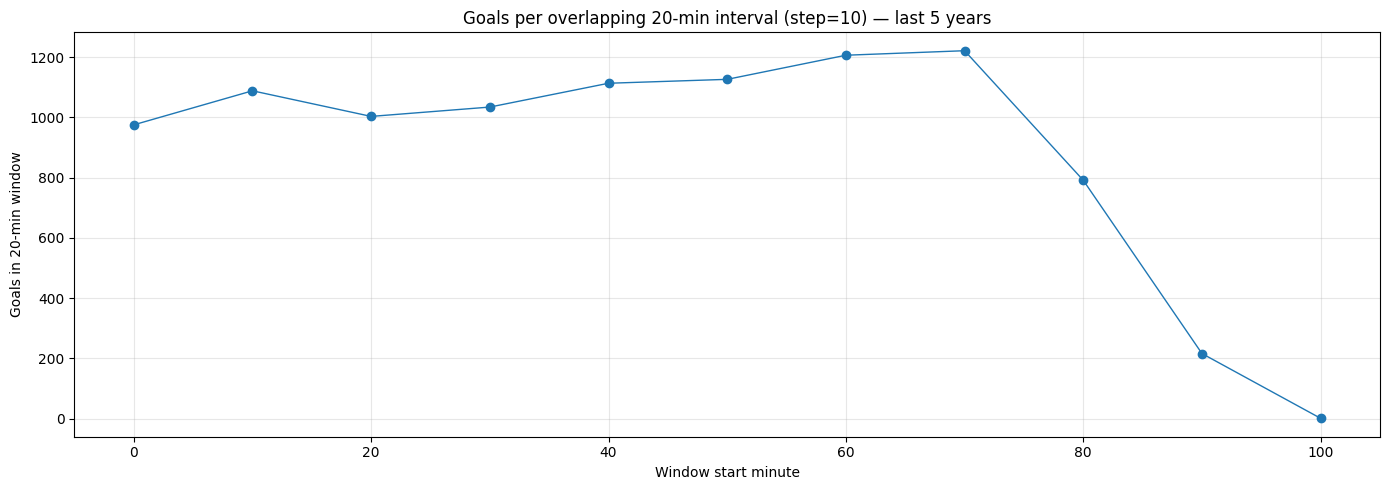

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Καθαρισμός χρόνου (αν δεν έχει γίνει ήδη) ---
df_last5['time'] = pd.to_numeric(df_last5['time'], errors='coerce')
df_last5 = df_last5.dropna(subset=['time'])
df_last5['time'] = df_last5['time'].astype(int)

# --- 1) Ορισμός sliding window ---
window_size = 20
step = 10
max_time = df_last5['time'].max()

intervals = []
counts = []

start = 0
while start <= max_time:
    end = start + window_size
    intervals.append(f"{start}-{end}")
    count = df_last5[(df_last5['time'] >= start) & (df_last5['time'] < end)].shape[0]
    counts.append(count)
    start += step

# --- 2) DataFrame ---
df_intervals_20_10 = pd.DataFrame({
    'interval': intervals,
    'goals': counts
})

df_intervals_20_10['start'] = df_intervals_20_10['interval'].str.split('-').str[0].astype(int)

# --- 3) Sorts ---
df_intervals_20_10_sorted_time = df_intervals_20_10.sort_values(by='start').reset_index(drop=True)
df_intervals_20_10_sorted_goals = df_intervals_20_10.sort_values(by='goals', ascending=False).reset_index(drop=True)

# --- 4) Print results ---
print("Top 20 intervals by goals (descending):")
print(df_intervals_20_10_sorted_goals.head(20).to_string(index=False))

print("\nFirst intervals (chronological):")
print(df_intervals_20_10_sorted_time.head(20).to_string(index=False))

# --- 5) Plot ---
plt.figure(figsize=(14,5))
plt.plot(df_intervals_20_10_sorted_time['start'], df_intervals_20_10_sorted_time['goals'], marker='o', linewidth=1)
plt.xlabel("Window start minute")
plt.ylabel("Goals in 20-min window")
plt.title("Goals per overlapping 20-min interval (step=10) — last 5 years")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Top 20 intervals by goals (descending):
interval  goals  start
   70-80    645     70
   80-90    576     80
   10-20    571     10
   50-60    565     50
   60-70    561     60
   40-50    548     40
   20-30    517     20
   30-40    486     30
    0-10    404      0
  90-100    215     90
 100-110      1    100

First intervals (chronological):
interval  goals  start
    0-10    404      0
   10-20    571     10
   20-30    517     20
   30-40    486     30
   40-50    548     40
   50-60    565     50
   60-70    561     60
   70-80    645     70
   80-90    576     80
  90-100    215     90
 100-110      1    100


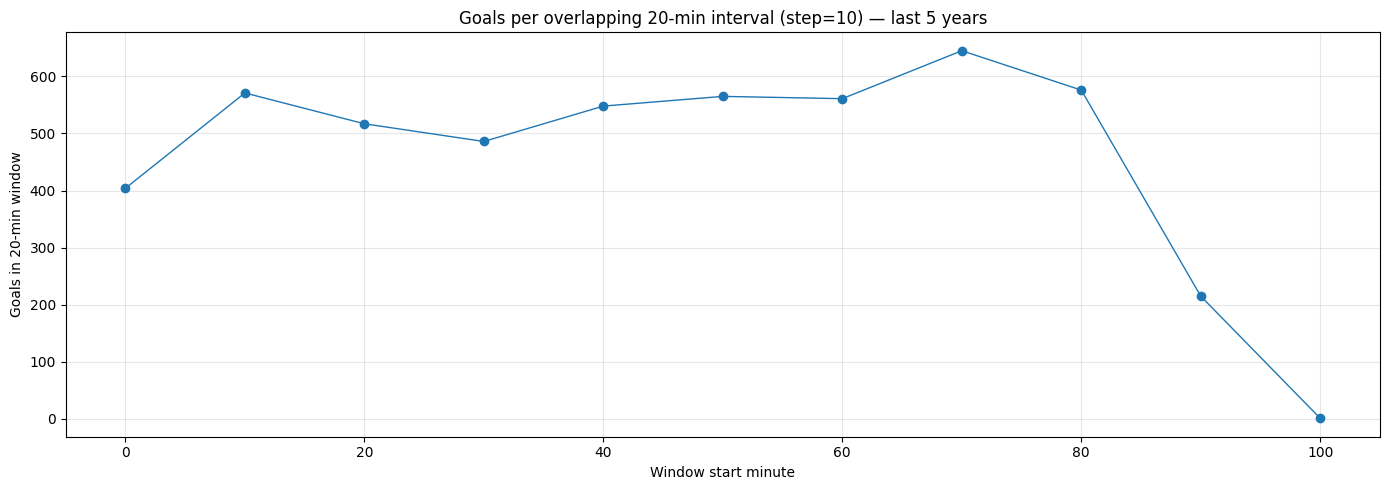

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Καθαρισμός χρόνου (αν δεν έχει γίνει ήδη) ---
df_last5['time'] = pd.to_numeric(df_last5['time'], errors='coerce')
df_last5 = df_last5.dropna(subset=['time'])
df_last5['time'] = df_last5['time'].astype(int)

# --- 1) Ορισμός sliding window ---
window_size = 10
step = 10
max_time = df_last5['time'].max()

intervals = []
counts = []

start = 0
while start <= max_time:
    end = start + window_size
    intervals.append(f"{start}-{end}")
    count = df_last5[(df_last5['time'] >= start) & (df_last5['time'] < end)].shape[0]
    counts.append(count)
    start += step

# --- 2) DataFrame ---
df_intervals_20_10 = pd.DataFrame({
    'interval': intervals,
    'goals': counts
})

df_intervals_20_10['start'] = df_intervals_20_10['interval'].str.split('-').str[0].astype(int)

# --- 3) Sorts ---
df_intervals_20_10_sorted_time = df_intervals_20_10.sort_values(by='start').reset_index(drop=True)
df_intervals_20_10_sorted_goals = df_intervals_20_10.sort_values(by='goals', ascending=False).reset_index(drop=True)

# --- 4) Print results ---
print("Top 20 intervals by goals (descending):")
print(df_intervals_20_10_sorted_goals.head(20).to_string(index=False))

print("\nFirst intervals (chronological):")
print(df_intervals_20_10_sorted_time.head(20).to_string(index=False))

# --- 5) Plot ---
plt.figure(figsize=(14,5))
plt.plot(df_intervals_20_10_sorted_time['start'], df_intervals_20_10_sorted_time['goals'], marker='o', linewidth=1)
plt.xlabel("Window start minute")
plt.ylabel("Goals in 20-min window")
plt.title("Goals per overlapping 20-min interval (step=10) — last 5 years")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [48]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # θα ανοίξει button για να επιλέξεις το events.csv

# Ανέβηκε το αρχείο
file_nameBundesLiga = list(uploadedFiles.keys())[0]

df = pd.read_csv(file_nameF)
print(df.head())



Saving bundesliga.csv to bundesliga (1).csv
   scoring_player        scoring_team time  GH  GA  \
0      Peter Wurz         VfB Mödling   27   1   0   
1    Manfred Zsak        Austria Wien   40   1   1   
2     Arnold Wetl          Sturm Graz   30   1   0   
3    Thomas Gröbl      Vorwärts Steyr   72   1   1   
4  Souleyman Sané  FC Tirol Innsbruck   54   1   0   

                                 game        date     season  
0    VfB Mödling vs. Austria Wien 1:1  1994-08-02  1994-1995  
1    VfB Mödling vs. Austria Wien 1:1  1994-08-02  1994-1995  
2   Sturm Graz vs. Vorwärts Steyr 1:1  1994-08-03  1994-1995  
3   Sturm Graz vs. Vorwärts Steyr 1:1  1994-08-03  1994-1995  
4  FC Tirol Innsbruck vs. FC Linz 3:0  1994-08-03  1994-1995  


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33808 entries, 0 to 33807
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   scoring_player  33808 non-null  object
 1   scoring_team    33808 non-null  object
 2   time            33808 non-null  object
 3   GH              33808 non-null  int64 
 4   GA              33808 non-null  int64 
 5   game            33808 non-null  object
 6   date            33808 non-null  object
 7   season          33808 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.1+ MB


In [51]:
# Μετατροπή date σε datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Μετατροπή time σε αριθμό
df['time'] = pd.to_numeric(df['time'], errors='coerce')

# Αφαίρεση γραμμών με invalid τιμές
df = df.dropna(subset=['time', 'date'])

print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 33502 entries, 0 to 33806
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   scoring_player  33502 non-null  object        
 1   scoring_team    33502 non-null  object        
 2   time            33502 non-null  float64       
 3   GH              33502 non-null  int64         
 4   GA              33502 non-null  int64         
 5   game            33502 non-null  object        
 6   date            33502 non-null  datetime64[ns]
 7   season          33502 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 2.3+ MB
None


In [52]:
cutoff = pd.Timestamp.today() - pd.DateOffset(years=10)
df10 = df[df['date'] >= cutoff].copy()

print("Σύνολο γραμμών τελευταία 10ετία:", len(df10))
print("Έυρος ημερομηνιών:", df10['date'].min(), "→", df10['date'].max())


Σύνολο γραμμών τελευταία 10ετία: 12158
Έυρος ημερομηνιών: 2015-11-28 00:00:00 → 2024-11-09 00:00:00


In [53]:
min_t = 0
max_t = int(df10['time'].max())

window = 20
step = 10

intervals_20_10 = []
goals_20_10 = []

start = min_t
while start <= max_t:
    end = start + window
    goals = df10[(df10['time'] >= start) & (df10['time'] <= end)].shape[0]

    intervals_20_10.append(f"{start}-{end}")
    goals_20_10.append(goals)

    start += step

df_20_10 = pd.DataFrame({
    "interval": intervals_20_10,
    "goals": goals_20_10
}).sort_values("goals", ascending=False)

df_20_10.head(20)


,interval,goals
7,70-90,3644
5,50-70,2949
4,40-60,2885
6,60-80,2876
3,30-50,2544
1,10-30,2481
2,20-40,2443
8,80-100,2252
0,0-20,2233
9,90-110,794


In [54]:
window = 10
step = 10

intervals_10_10 = []
goals_10_10 = []

start = min_t
while start <= max_t:
    end = start + window
    goals = df10[(df10['time'] >= start) & (df10['time'] <= end)].shape[0]

    intervals_10_10.append(f"{start}-{end}")
    goals_10_10.append(goals)

    start += step

df_10_10 = pd.DataFrame({
    "interval": intervals_10_10,
    "goals": goals_10_10
}).sort_values("goals", ascending=False)

df_10_10.head(20)


,interval,goals
8,80-90,2252
5,50-60,1590
6,60-70,1531
7,70-80,1515
4,40-50,1404
1,10-20,1297
2,20-30,1294
3,30-40,1267
0,0-10,1069
9,90-100,793


In [55]:
window = 10
step = 1

intervals_10_1 = []
goals_10_1 = []

start = min_t
while start <= max_t:
    end = start + window
    goals = df10[(df10['time'] >= start) & (df10['time'] <= end)].shape[0]

    intervals_10_1.append(f"{start}-{end}")
    goals_10_1.append(goals)

    start += step

df_10_1 = pd.DataFrame({
    "interval": intervals_10_1,
    "goals": goals_10_1
}).sort_values("goals", ascending=False)

df_10_1.head(20)


,interval,goals
80,80-90,2252
81,81-91,2129
82,82-92,1996
83,83-93,1859
84,84-94,1725
78,78-88,1623
79,79-89,1614
51,51-61,1609
54,54-64,1606
53,53-63,1605


In [56]:
top_20_10 = df_20_10.iloc[0]
top_10_10 = df_10_10.iloc[0]
top_10_1 = df_10_1.iloc[0]

print("🔥 TOP SCORING PERIODS – Bundesliga 10 years\n")

print(f"20-min window / step 10 → {top_20_10['interval']}  | goals: {top_20_10['goals']}")
print(f"10-min window / step 10 → {top_10_10['interval']}  | goals: {top_10_10['goals']}")
print(f"10-min window / step 1  → {top_10_1['interval']}  | goals: {top_10_1['goals']}")


🔥 TOP SCORING PERIODS – Bundesliga 10 years

20-min window / step 10 → 70-90  | goals: 3644
10-min window / step 10 → 80-90  | goals: 2252
10-min window / step 1  → 80-90  | goals: 2252


In [57]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # θα ανοίξει button για να επιλέξεις το events.csv

# Ανέβηκε το αρχείο
file_namePremierLeague = list(uploadedFiles.keys())[0]

df = pd.read_csv(file_nameF)
print(df.head())


Saving eng-premier-league.csv to eng-premier-league (1).csv
   scoring_player        scoring_team time  GH  GA  \
0      Peter Wurz         VfB Mödling   27   1   0   
1    Manfred Zsak        Austria Wien   40   1   1   
2     Arnold Wetl          Sturm Graz   30   1   0   
3    Thomas Gröbl      Vorwärts Steyr   72   1   1   
4  Souleyman Sané  FC Tirol Innsbruck   54   1   0   

                                 game        date     season  
0    VfB Mödling vs. Austria Wien 1:1  1994-08-02  1994-1995  
1    VfB Mödling vs. Austria Wien 1:1  1994-08-02  1994-1995  
2   Sturm Graz vs. Vorwärts Steyr 1:1  1994-08-03  1994-1995  
3   Sturm Graz vs. Vorwärts Steyr 1:1  1994-08-03  1994-1995  
4  FC Tirol Innsbruck vs. FC Linz 3:0  1994-08-03  1994-1995  


In [58]:
# Μετατροπή date σε datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Μετατροπή time σε αριθμό
df['time'] = pd.to_numeric(df['time'], errors='coerce')

# Αφαίρεση γραμμών με invalid τιμές
df = df.dropna(subset=['time', 'date'])

print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 33502 entries, 0 to 33806
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   scoring_player  33502 non-null  object        
 1   scoring_team    33502 non-null  object        
 2   time            33502 non-null  float64       
 3   GH              33502 non-null  int64         
 4   GA              33502 non-null  int64         
 5   game            33502 non-null  object        
 6   date            33502 non-null  datetime64[ns]
 7   season          33502 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 2.3+ MB
None


In [59]:
cutoff = pd.Timestamp.today() - pd.DateOffset(years=10)
df10 = df[df['date'] >= cutoff].copy()

print("Σύνολο γραμμών τελευταία 10ετία:", len(df10))
print("Έυρος ημερομηνιών:", df10['date'].min(), "→", df10['date'].max())


Σύνολο γραμμών τελευταία 10ετία: 12158
Έυρος ημερομηνιών: 2015-11-28 00:00:00 → 2024-11-09 00:00:00


In [60]:
min_t = 0
max_t = int(df10['time'].max())

window = 20
step = 10

intervals_20_10 = []
goals_20_10 = []

start = min_t
while start <= max_t:
    end = start + window
    goals = df10[(df10['time'] >= start) & (df10['time'] <= end)].shape[0]

    intervals_20_10.append(f"{start}-{end}")
    goals_20_10.append(goals)

    start += step

df_20_10 = pd.DataFrame({
    "interval": intervals_20_10,
    "goals": goals_20_10
}).sort_values("goals", ascending=False)

df_20_10.head(20)


,interval,goals
7,70-90,3644
5,50-70,2949
4,40-60,2885
6,60-80,2876
3,30-50,2544
1,10-30,2481
2,20-40,2443
8,80-100,2252
0,0-20,2233
9,90-110,794


In [61]:
window = 10
step = 10

intervals_10_10 = []
goals_10_10 = []

start = min_t
while start <= max_t:
    end = start + window
    goals = df10[(df10['time'] >= start) & (df10['time'] <= end)].shape[0]

    intervals_10_10.append(f"{start}-{end}")
    goals_10_10.append(goals)

    start += step

df_10_10 = pd.DataFrame({
    "interval": intervals_10_10,
    "goals": goals_10_10
}).sort_values("goals", ascending=False)

df_10_10.head(20)


,interval,goals
8,80-90,2252
5,50-60,1590
6,60-70,1531
7,70-80,1515
4,40-50,1404
1,10-20,1297
2,20-30,1294
3,30-40,1267
0,0-10,1069
9,90-100,793


In [62]:
window = 10
step = 1

intervals_10_1 = []
goals_10_1 = []

start = min_t
while start <= max_t:
    end = start + window
    goals = df10[(df10['time'] >= start) & (df10['time'] <= end)].shape[0]

    intervals_10_1.append(f"{start}-{end}")
    goals_10_1.append(goals)

    start += step

df_10_1 = pd.DataFrame({
    "interval": intervals_10_1,
    "goals": goals_10_1
}).sort_values("goals", ascending=False)

df_10_1.head(20)


,interval,goals
80,80-90,2252
81,81-91,2129
82,82-92,1996
83,83-93,1859
84,84-94,1725
78,78-88,1623
79,79-89,1614
51,51-61,1609
54,54-64,1606
53,53-63,1605


In [63]:
top_20_10 = df_20_10.iloc[0]
top_10_10 = df_10_10.iloc[0]
top_10_1 = df_10_1.iloc[0]

print("🔥 TOP SCORING PERIODS – Bundesliga 10 years\n")

print(f"20-min window / step 10 → {top_20_10['interval']}  | goals: {top_20_10['goals']}")
print(f"10-min window / step 10 → {top_10_10['interval']}  | goals: {top_10_10['goals']}")
print(f"10-min window / step 1  → {top_10_1['interval']}  | goals: {top_10_1['goals']}")


🔥 TOP SCORING PERIODS – Bundesliga 10 years

20-min window / step 10 → 70-90  | goals: 3644
10-min window / step 10 → 80-90  | goals: 2252
10-min window / step 1  → 80-90  | goals: 2252


In [64]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # θα ανοίξει button για να επιλέξεις το events.csv

# Ανέβηκε το αρχείο
file_namePremierLeague = list(uploadedFiles.keys())[0]

df = pd.read_csv(file_nameF)

# Μετατροπή date σε datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Μετατροπή time σε αριθμό
df['time'] = pd.to_numeric(df['time'], errors='coerce')

# Αφαίρεση γραμμών με invalid τιμές
df = df.dropna(subset=['time', 'date'])

cutoff = pd.Timestamp.today() - pd.DateOffset(years=10)
df10 = df[df['date'] >= cutoff].copy()

print("Σύνολο γραμμών τελευταία 10ετία:", len(df10))
print("Έυρος ημερομηνιών:", df10['date'].min(), "→", df10['date'].max())


min_t = 0
max_t = int(df10['time'].max())

window = 20
step = 10

intervals_20_10 = []
goals_20_10 = []

start = min_t
while start <= max_t:
    end = start + window
    goals = df10[(df10['time'] >= start) & (df10['time'] <= end)].shape[0]

    intervals_20_10.append(f"{start}-{end}")
    goals_20_10.append(goals)

    start += step

df_20_10 = pd.DataFrame({
    "interval": intervals_20_10,
    "goals": goals_20_10
}).sort_values("goals", ascending=False)

df_20_10.head(20)

Saving champions-league.csv to champions-league (1).csv
Σύνολο γραμμών τελευταία 10ετία: 12158
Έυρος ημερομηνιών: 2015-11-28 00:00:00 → 2024-11-09 00:00:00


,interval,goals
7,70-90,3644
5,50-70,2949
4,40-60,2885
6,60-80,2876
3,30-50,2544
1,10-30,2481
2,20-40,2443
8,80-100,2252
0,0-20,2233
9,90-110,794


In [65]:
window = 10
step = 10

intervals_10_10 = []
goals_10_10 = []

start = min_t
while start <= max_t:
    end = start + window
    goals = df10[(df10['time'] >= start) & (df10['time'] <= end)].shape[0]

    intervals_10_10.append(f"{start}-{end}")
    goals_10_10.append(goals)

    start += step

df_10_10 = pd.DataFrame({
    "interval": intervals_10_10,
    "goals": goals_10_10
}).sort_values("goals", ascending=False)

df_10_10.head(20)

,interval,goals
8,80-90,2252
5,50-60,1590
6,60-70,1531
7,70-80,1515
4,40-50,1404
1,10-20,1297
2,20-30,1294
3,30-40,1267
0,0-10,1069
9,90-100,793
